In [1]:
import numpy             as np
import matplotlib.pyplot as plt
from matplotlib          import rc 
from IPython.display import IFrame, display

In [5]:
file = 'Lectures/Raices_Interpolacion.pdf'
#IFrame(file, width=600, height=400)

# Método de Newton-Raphson
$x_{n+1} = x_{n} - \frac{f(x_{n})}{f'(x_{n})}$

In [78]:
def Function(x):
  #  return x**x - 100
  #  return (x**3 - 4*x**2 - 2)/(x-4.117949)
    return (2*x**4 - 2*x**3 + x**2 + 3*x - 4)

In [79]:
def Derivada(f,x,h):
    d = 0.
    if(h!=0):
        d = (f(x+h)-f(x-h))/(2.*h)
    return d

In [80]:
xi, xf, Npoints = -2., 2., 50
h = (xf-xi)/float(Npoints)

In [81]:
X = np.linspace(xi,xf,Npoints)
Y = Function(X)

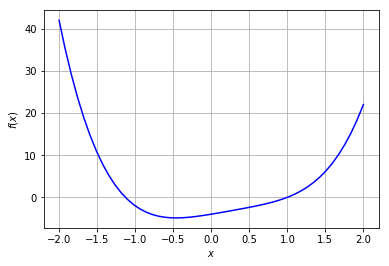

In [82]:
plt.plot(X,Y,'b')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.grid()
plt.show()

In [85]:
# Definamos el metodo

def NewtonMethod(Function, Derivada, xn, error, iteracion):
    precision = 1.0e-1
    h = 1.0e-4
    
    if( (error > precision) and (iteracion < 2000) ):
        
        try:
            
            xn1 = xn - (Function(xn))/Derivada(Function,xn,h)
            error = abs(xn1-xn)/abs(xn1)
           # print(xn1,error)
            NewtonMethod(Function, Derivada, xn1, error, iteracion+1)
            
        except ZeroDivisionError:
            print("Division by Zero")
    else:
        print('xn=%f, f(xn)=%f' %(xn, Function(xn)))

In [87]:
NewtonMethod(Function,Derivada,4,1000,0)

#x = np.linspace(-10,10,100)

#for i in range(len(x)):
#    NewtonMethod(Function,Derivada,x[i],1000,0)

xn=1.011520, f(xn)=0.081581


# Interpolación de lagrange

$p_{n}(x) = \sum_{i = 0}^{n} L_{i}(x)f(x_{i}), \ $
$L_{i}(x) = \prod_{j \neq i} \frac{x - x_{j}}{x_{i} - x_{j}}$

In [88]:
def Lagrange(x, xi, j, n):
    prod = 1.0
    
    for k in range(n+1):
        if(k != j):
            prod = prod*(x-xi[k])/(xi[j]-xi[k])
            
    return prod

In [89]:
def Poly(x,xi,fxi,n):
    summ = 0
    
    for j in range(n+1):
        summ = summ + fxi[j]*Lagrange(x,xi,j,n)
        
    return summ

In [90]:
X1 = [5.,10.]
Y1 = [10.,15.]

In [92]:
Data_ = np.arange(2.,12+0.5,0.5)
print(Data_)

[ 2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5  8.   8.5
  9.   9.5 10.  10.5 11.  11.5 12. ]


In [95]:
px1 = Poly(Data_,X1,Y1,1) # Grado del polinomio
print(Data_,px1)

(array([ 2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,
        7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. ]), array([ 7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. ,
       12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. ]))


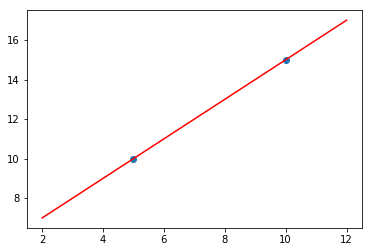

In [94]:
plt.plot(Data_,px1,'r',label='p(x)')
plt.scatter(X1,Y1,label='f(x)')

In [102]:
X1 = [-1,2,3,4]
Y1 = [3,1,2,4]

Data_ = np.arange(-2., 5.+0.5, 0.5)
px3 = Poly(Data_,X1,Y1,3)

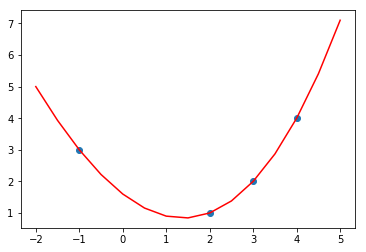

In [103]:
plt.plot(Data_,px3,'r',label='p(x)')
plt.scatter(X1,Y1,label='f(x)')

In [111]:
# Definamos una funcion general

def f(x):
    
    return 1/(25*x**2+1)

In [135]:
xi, xf = -1, 1.
n = 5 # Grado del polinomio

h = (xf-xi)/n

X = np.arange(xi,xf+h,h)
Y = f(X)

In [136]:
h2 = (xf-xi)/1000
Data = np.arange(xi, xf+h2, h2)

In [137]:
px = Poly(Data, X, Y, n)
fx = f(Data)

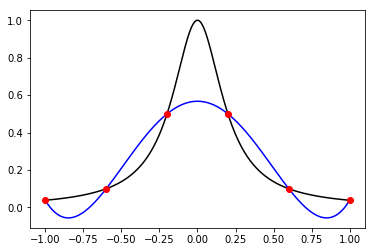

In [138]:
plt.plot(Data,px,'b')
plt.plot(Data,fx,'k')
plt.plot(X,Y,'ro')
#plt.xlim(-0.2,0.2)
#plt.ylim(0.,1.0)